# Gradient Descent

Solve for minimum of the cost function

- Start with some $\theta_0, \theta_1$
- Keep changing  $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$ until we hopefully end up at the minimum.

## Algorithm

**:= ⇒ assignment**

$**\alpha$ ⇒ learning rate - how big are the gradient descent steps**

$**\partial$ ⇒ partial derivative** - taking derivative with respect to one variable while holding the other one constant

repeat until convergence {
	$\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)$ (for j = 0 and j = 1)
}

**Simultaneously update all the $\theta$ parameters!!**

### Correct Implementation

temp0 $:=\theta_0-\alpha\frac{\partial}{\partial\theta_0}J(\theta_0,\theta_1)$

temp1 $:=\theta_1-\alpha\frac{\partial}{\partial\theta_1}J(\theta_0,\theta_1)$

$\theta_0:=$ temp0

$\theta_1:=$ temp1

***incorrect to update one parameter before calculating the other**

- if $\alpha$ is too small, gradient descent can be slow
- if $\alpha$ is too large, gradient descent can overshoot the minimum, it may fail to converge, or even diverge.

**Batch** **Gradient Descent** **-** each step of gradient descent uses all the training examples


## Gradient Descent for Linear Regression

$\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum^m_{i = 1}(h_\theta(x^{(i)}) - y^{(i)})^2$

$\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum^m_{i = 1}(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$

### Simple Multivariable Calculus

$j=0:\frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1) = \frac{2}{2m}\sum^m_{i = 1}(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) (1) = \frac{1}{m}\sum^m_{i = 1}(h_\theta(x^{(j)} - y^{(i)})$ 

$j=1:\frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1) = \frac{2}{2m}\sum^m_{i = 1}(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) (x^{(i)}) = \frac{1}{m}\sum^m_{i = 1}(h_\theta(x^{(j)} - y^{(i)})(x^{(i)})$

## Linear Regression Scalar Implementation

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
# get dataset x: poverty percent, y: birth 15-17
# https://online.stat.psu.edu/stat462/node/101/
dataset = pd.read_csv('data/poverty.txt', delimiter="\t")

# print dataset
dataset.iloc[:5,:]

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


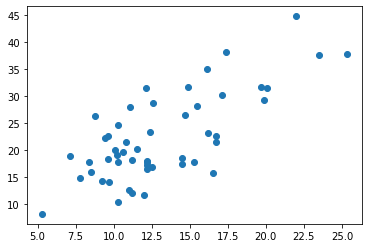

In [101]:
# get x and y columns
x_data = np.array(dataset['PovPct'].values)
y_data = np.array(dataset['Brth15to17'].values)
plt.scatter(x_data, y_data)

In [159]:
# prediction function takes in x and predicts y
def hypothesis_function(x):
    return theta0 + theta1 * x

# cost function
def cost_function(x, y, theta0, theta1):
    return np.sum(np.square(theta0 + theta1 * x - y)) / len(x) / 2

# partial derivative of the cost function with respect to theta0
def cost_derivative_theta0(x, y, theta0, theat1):
    return np.sum(theta0 + theta1 * x - y) / len(x)
    
# partial derivative of the cost function with respect to theta1
def cost_derivative_theta1(x, y, theta0, theta1, ):
    return np.sum((theta0 + theta1 * x - y) * x) / len(x)

# gradient descent that updates theta0 and theta1
# alpha: learning rate
# i: iteration
def gradient_descent(x, y, theta0, theta1, alpha):
    temp0 = theta0 - alpha * cost_derivative_theta0(x, y, theta0, theta1)
    temp1 = theta1 - alpha * cost_derivative_theta1(x, y, theta0, theta1)
    return (temp0, temp1)

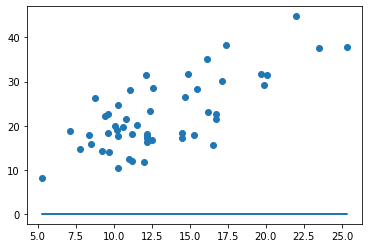

In [140]:
# initial plot
plt.scatter(x_data, y_data)
plt.plot(x, hypothesis_function(x))

initial cost: 279.96627450980395
final cost:   14.924552157717306
y = 1.485x + 2.645


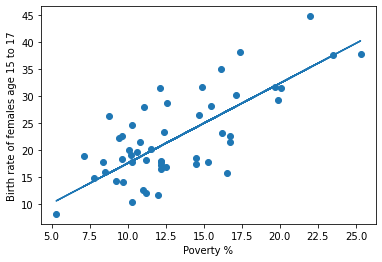

In [183]:
# initialize parameters
theta0 = 0
theta1 = 0

# perform gradient descent
print('initial cost: ' + str(cost_function(x, y, theta0, theta1)))
for _ in range(1000):
    theta0, theta1 = gradient_descent(x_data, y_data, theta0, theta1, 0.01)
    
print('final cost:   ' +  str(cost_function(x, y, theta0, theta1)))
print('y = ' + str(round(theta1, 3)) + "x + " + str(round(theta0, 3)))
# post training plot
plt.scatter(x_data, y_data)
plt.xlabel("Poverty %")
plt.ylabel("Birth rate of females age 15 to 17")
plt.plot(x, hypothesis_function(x))